In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
from matplotlib import rc, rcParams, style
#style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Times'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
def fun(x,y):
    out =  0.5 * (x+y-np.abs(x-y))
    return out
n = 500
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)

X, Y = np.meshgrid(x, y)
x = X.reshape((-1,1))
y = Y.reshape((-1,1))

n2 = n*n
out = np.empty((n2,1))
for i in range(n2):
    out[i] = fun(x[i],y[i])
Z_energy = np.mean(out, axis = 1)
Z_energy = np.reshape(Z_energy, (n,n))

In [5]:
theta = 0.1
matern = ot.MaternModel([theta], [1.0], 2.5)
out = np.empty((n2,1))
for i in range(n2):
    out[i] = matern.computeAsScalar(x[i], y[i])
Z_matern = np.mean(out, axis = 1)
Z_matern = np.reshape(Z_matern,(n,n))

In [6]:
gaussian = ot.SquaredExponential([theta], [1.])
out = np.empty((n2,1))
for i in range(n2):
    out[i] = gaussian.computeAsScalar(x[i], y[i])
Z_gaussian = np.mean(out, axis = 1)
Z_gaussian = np.reshape(Z_gaussian, (n,n))

## 2D plots

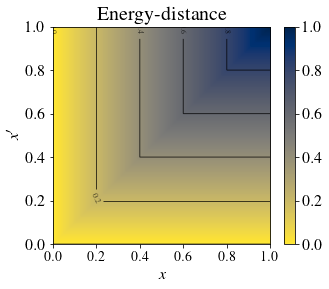

In [7]:
cbar = cm.cividis_r
plt.figure(figsize=(5, 4))


contours = plt.contour(X, Y, Z_energy, 4, colors='k', linewidths=1, alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_energy, extent=[0, 1, 0, 1], origin='lower', cmap=cbar)
#plt.contourf(X, Y, Z_energy, 50, linewidths=0, negative_linestyles=None, cmap=cbar)
plt.xlabel("$x$")
plt.ylabel("$x'$")
plt.title("Energy-distance")
plt.colorbar()
plt.savefig("res/energy_kernel.pdf", bbox_inches='tight');

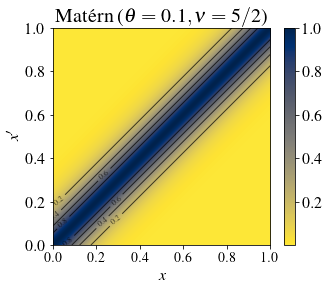

In [8]:
plt.figure(figsize=(5, 4))

contours = plt.contour(X, Y, Z_matern, 4, colors='k', linewidths=1, alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_matern, extent=[0, 1, 0, 1], origin='lower', cmap=cbar)
#plt.contourf(X, Y, Z_matern, 50, cmap=cbar)
plt.xlabel("$x$")
plt.ylabel("$x'$")
plt.title("Matérn ($\\theta={}, \\nu=5/2$)".format(theta))
plt.colorbar()
plt.savefig("res/matern_kernel.pdf", bbox_inches='tight');

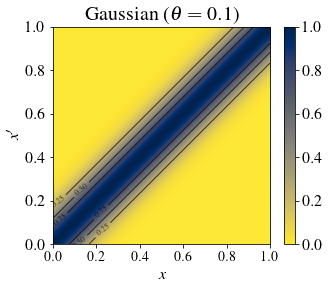

In [9]:
plt.figure(figsize=(5, 4))

contours = plt.contour(X, Y, Z_gaussian, 4, colors='k', linewidths=1, alpha=0.7)
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_gaussian, extent=[0, 1, 0, 1], origin='lower', cmap=cbar)
#plt.contourf(X, Y, Z_gaussian, 50, cmap=cbar)
plt.xlabel("$x$")
plt.ylabel("$x'$")
plt.title("Gaussian ($\\theta={}$)".format(theta))
plt.colorbar()
plt.savefig("res/gaussian_kernel.pdf", bbox_inches='tight');

## 3D plots

In [10]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_11316/3783272354.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/tmp/ipykernel_11316/3783272354.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


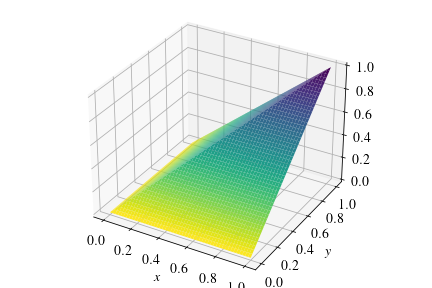

In [11]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z_energy, cmap=cm.viridis_r)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.tight_layout()

/tmp/ipykernel_11316/4067346092.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/tmp/ipykernel_11316/4067346092.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


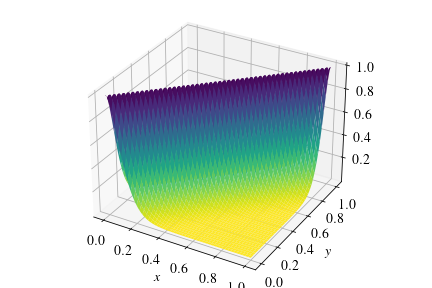

In [12]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(X, Y, Z_matern, cmap=cm.viridis_r)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.tight_layout();

/tmp/ipykernel_11316/2609313425.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/tmp/ipykernel_11316/2609313425.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


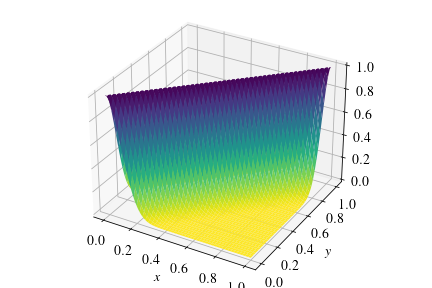

In [13]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(X, Y, Z_gaussian, cmap=cm.viridis_r)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.tight_layout();